In [113]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn import preprocessing
import time

In [114]:
# from google.colab import drive
# drive.mount('/content/drive')

In [115]:
dataset = '535210039_dataset_komoditas_WIT.xlsx'

In [116]:
df = pd.read_excel(dataset, sheet_name='Bali')

In [117]:
df.head()

,Date,Beras,Daging Ayam,Daging Sapi,Telur Ayam,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Minyak Goreng,Gula Pasir
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,11350.0,36250.0,108750.0,23900.0,34650.0,26400.0,29500.0,33650.0,13500.0,13600.0
2,2020-01-03,11350.0,36250.0,108750.0,23500.0,34650.0,27000.0,30500.0,32600.0,13500.0,13600.0
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df.isna().sum()/len(df)*100

Date              0.000000
Beras            32.184808
Daging Ayam      32.184808
Daging Sapi      32.184808
Telur Ayam       32.184808
Bawang Merah     32.184808
Bawang Putih     32.184808
Cabai Merah      32.184808
Cabai Rawit      32.184808
Minyak Goreng    32.184808
Gula Pasir       32.184808
dtype: float64

In [119]:
# Menangani Missing Values
df = df.ffill()
df = df.bfill()

In [120]:
df.isna().sum()/len(df)*100

Date             0.0
Beras            0.0
Daging Ayam      0.0
Daging Sapi      0.0
Telur Ayam       0.0
Bawang Merah     0.0
Bawang Putih     0.0
Cabai Merah      0.0
Cabai Rawit      0.0
Minyak Goreng    0.0
Gula Pasir       0.0
dtype: float64

In [121]:
df2 = df.drop(['Date'], axis = 1)

In [122]:
df2.head()

,Beras,Daging Ayam,Daging Sapi,Telur Ayam,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Minyak Goreng,Gula Pasir
0,11350.0,36250.0,108750.0,23900.0,34650.0,26400.0,29500.0,33650.0,13500.0,13600.0
1,11350.0,36250.0,108750.0,23900.0,34650.0,26400.0,29500.0,33650.0,13500.0,13600.0
2,11350.0,36250.0,108750.0,23500.0,34650.0,27000.0,30500.0,32600.0,13500.0,13600.0
3,11350.0,36250.0,108750.0,23500.0,34650.0,27000.0,30500.0,32600.0,13500.0,13600.0
4,11350.0,36250.0,108750.0,23500.0,34650.0,27000.0,30500.0,32600.0,13500.0,13600.0


In [123]:
correlation = df2.corr()
correlation

,Beras,Daging Ayam,Daging Sapi,Telur Ayam,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Minyak Goreng,Gula Pasir
Beras,1.000000,0.132976,0.801429,0.673472,0.130668,0.358046,0.072118,0.110976,0.203710,0.332184
Daging Ayam,0.132976,1.000000,0.227143,0.243279,0.096578,0.049140,0.254819,0.111221,0.228605,-0.040371
Daging Sapi,0.801429,0.227143,1.000000,0.776482,0.100998,0.225436,0.204288,0.129146,0.550773,0.276709
Telur Ayam,0.673472,0.243279,0.776482,1.000000,-0.000297,0.198708,0.298301,0.306796,0.549874,0.108150
Bawang Merah,0.130668,0.096578,0.100998,-0.000297,1.000000,0.157848,0.413999,0.308407,-0.078571,0.575139
Bawang Putih,0.358046,0.049140,0.225436,0.198708,0.157848,1.000000,0.237312,0.106269,-0.118731,0.446383
Cabai Merah,0.072118,0.254819,0.204288,0.298301,0.413999,0.237312,1.000000,0.683527,0.232584,0.010377
Cabai Rawit,0.110976,0.111221,0.129146,0.306796,0.308407,0.106269,0.683527,1.000000,0.226836,-0.072863
Minyak Goreng,0.203710,0.228605,0.550773,0.549874,-0.078571,-0.118731,0.232584,0.226836,1.000000,-0.075024
Gula Pasir,0.332184,-0.040371,0.276709,0.108150,0.575139,0.446383,0.010377,-0.072863,-0.075024,1.000000


In [124]:
df3 = df2.transpose()
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276
Beras,11350.0,11350.0,11350.0,11350.0,11350.0,11350.0,11350.0,11350.0,11500.0,11500.0,...,12950.0,12950.0,12950.0,12950.0,12950.0,12950.0,12950.0,12950.0,12950.0,12950.0
Daging Ayam,36250.0,36250.0,36250.0,36250.0,36250.0,36250.0,36000.0,36000.0,36000.0,36000.0,...,43250.0,43250.0,42650.0,42650.0,42650.0,42250.0,41750.0,41750.0,41750.0,41750.0
Daging Sapi,108750.0,108750.0,108750.0,108750.0,108750.0,108750.0,108750.0,108750.0,108750.0,108750.0,...,119700.0,119700.0,119700.0,119700.0,119700.0,119700.0,120950.0,120950.0,120950.0,120950.0
Telur Ayam,23900.0,23900.0,23500.0,23500.0,23500.0,23500.0,23500.0,23500.0,23500.0,23500.0,...,29800.0,29600.0,29600.0,29600.0,29600.0,29800.0,29800.0,29800.0,29800.0,29800.0
Bawang Merah,34650.0,34650.0,34650.0,34650.0,34650.0,34150.0,33250.0,33250.0,35250.0,35250.0,...,26650.0,26650.0,26650.0,26650.0,26650.0,26650.0,26650.0,26650.0,26650.0,26650.0


In [125]:
clusterer = KMeans(n_clusters = 5, random_state = 0)
cluster_labels = clusterer.fit_predict(df3)

In [126]:
len(cluster_labels)

10

In [127]:
d = {'Commodities': df3.index, 'Cluster': cluster_labels}
df_cluster = pd.DataFrame(d)
df_cluster

,Commodities,Cluster
0,Beras,0
1,Daging Ayam,4
2,Daging Sapi,1
3,Telur Ayam,3
4,Bawang Merah,3
5,Bawang Putih,3
6,Cabai Merah,2
7,Cabai Rawit,2
8,Minyak Goreng,0
9,Gula Pasir,0


In [128]:
komoditas_0 = df_cluster[df_cluster['Cluster'] == 0]
komoditas_0 = komoditas_0['Commodities']
komoditas_0

0            Beras
8    Minyak Goreng
9       Gula Pasir
Name: Commodities, dtype: object

Beras
Minyak Goreng
Gula Pasir


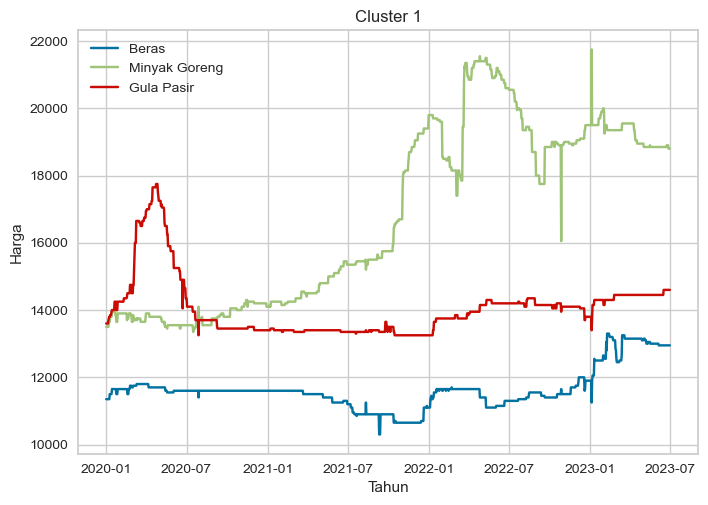

In [129]:
for i in komoditas_0:
    print(i)
    plt.plot(df['Date'], df[i])

plt.title('Cluster 1')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend(komoditas_0)

In [130]:
# Analisis Statistika untuk cluster 1
df1 = df[komoditas_0]
df1.describe()

,Beras,Minyak Goreng,Gula Pasir
count,1277.000000,1277.000000,1277.000000
mean,11635.082224,16768.911511,14046.358653
std,605.236628,2671.698118,884.406699
min,10300.000000,13350.000000,13250.000000
25%,11350.000000,14100.000000,13400.000000
50%,11600.000000,15750.000000,13850.000000
75%,11650.000000,19250.000000,14300.000000
max,13300.000000,21750.000000,17750.000000


In [131]:
komoditas_1 = df_cluster[df_cluster['Cluster'] == 1]
komoditas_1 = komoditas_1['Commodities']
komoditas_1

2    Daging Sapi
Name: Commodities, dtype: object

Daging Sapi


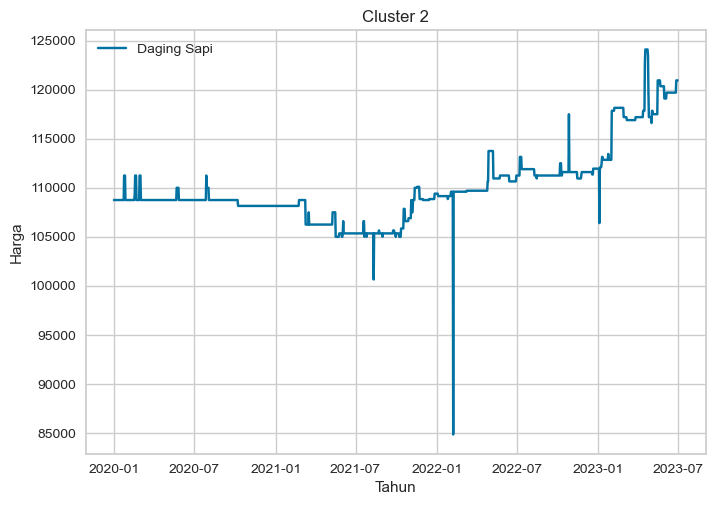

In [132]:
for i in komoditas_1:
    print(i)
    plt.plot(df['Date'], df[i])

plt.title('Cluster 2')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend(komoditas_1)

In [133]:
# Analisis Statistika untuk cluster 2
df2 = df[komoditas_1]
df2.describe()

,Daging Sapi
count,1277.000000
mean,110010.336727
std,3824.007806
min,84850.000000
25%,108150.000000
50%,108750.000000
75%,111250.000000
max,124100.000000


In [134]:
komoditas_2 = df_cluster[df_cluster['Cluster'] == 2]
komoditas_2 = komoditas_2['Commodities']
komoditas_2

6    Cabai Merah
7    Cabai Rawit
Name: Commodities, dtype: object

Cabai Merah
Cabai Rawit


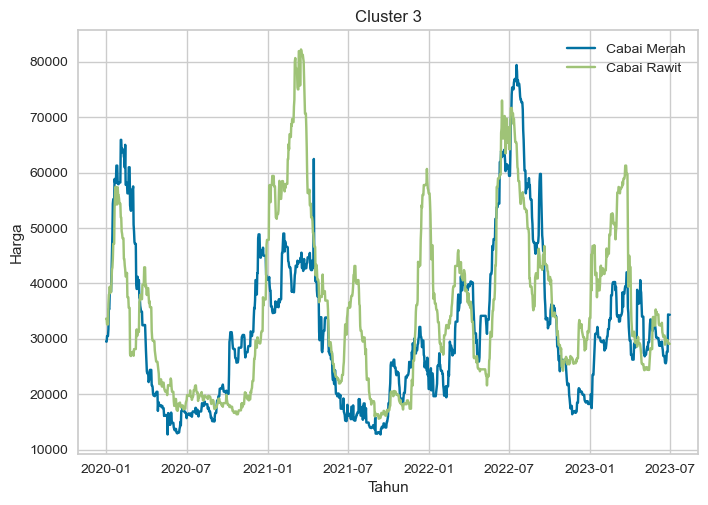

In [135]:
for i in komoditas_2:
    print(i)
    plt.plot(df['Date'], df[i])

plt.title('Cluster 3')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend(komoditas_2)

In [136]:
# Analisis Statistika untuk cluster 2
df_3 = df[komoditas_2]
df_3.describe()

,Cabai Merah,Cabai Rawit
count,1277.000000,1277.000000
mean,31784.377447,35604.659358
std,14258.223191,15353.339670
min,12750.000000,15600.000000
25%,19900.000000,22600.000000
50%,29250.000000,32400.000000
75%,39500.000000,43250.000000
max,79400.000000,82200.000000


In [137]:
komoditas_3 = df_cluster[df_cluster['Cluster'] == 3]
komoditas_3 = komoditas_3['Commodities']
komoditas_3

3      Telur Ayam
4    Bawang Merah
5    Bawang Putih
Name: Commodities, dtype: object

Telur Ayam
Bawang Merah
Bawang Putih


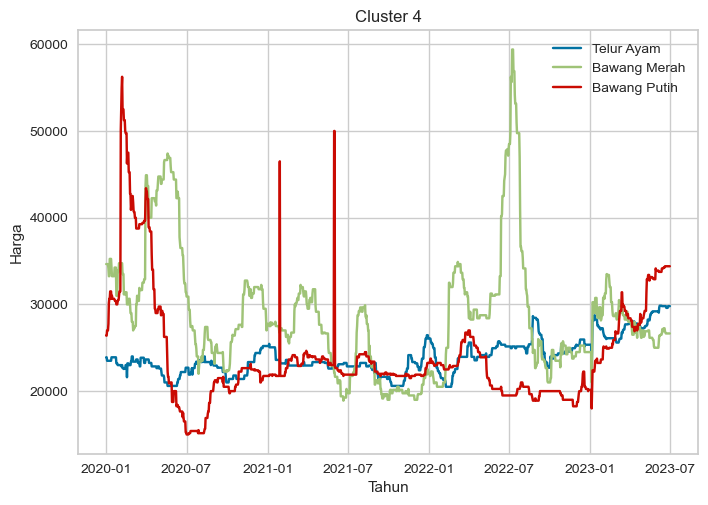

In [138]:
for i in komoditas_3:
    print(i)
    plt.plot(df['Date'], df[i])

plt.title('Cluster 4')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend(komoditas_3)

In [139]:
# Analisis Statistika untuk cluster 2
df_4 = df[komoditas_3]
df_4.describe()

,Telur Ayam,Bawang Merah,Bawang Putih
count,1277.000000,1277.000000,1277.000000
mean,23980.931872,28622.122161,24137.862177
std,2091.890445,7076.112879,6237.755207
min,20500.000000,18900.000000,15000.000000
25%,22700.000000,24250.000000,20500.000000
50%,23400.000000,27500.000000,22400.000000
75%,25150.000000,31250.000000,25000.000000
max,29850.000000,59400.000000,56250.000000


In [140]:
komoditas_4 = df_cluster[df_cluster['Cluster'] == 4]
komoditas_4 = komoditas_4['Commodities']
komoditas_4

1    Daging Ayam
Name: Commodities, dtype: object

Daging Ayam


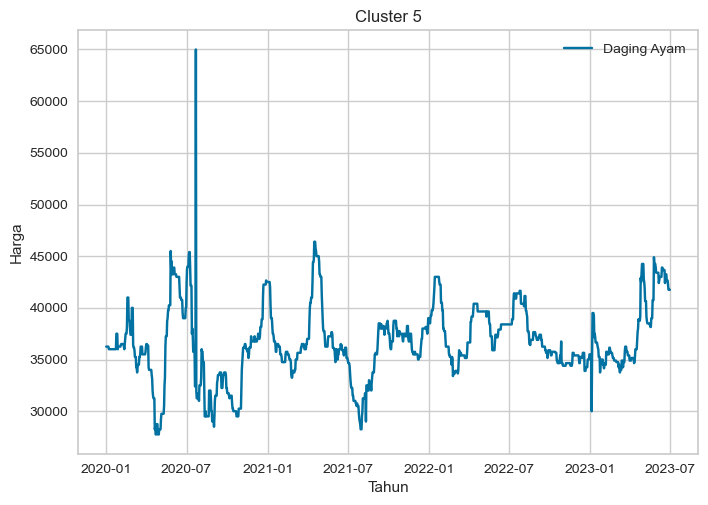

In [141]:
for i in komoditas_4:
    print(i)
    plt.plot(df['Date'], df[i])

plt.title('Cluster 5')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend(komoditas_4)

In [142]:
# Analisis Statistika untuk cluster 2
df_5 = df[komoditas_4]
df_5.describe()

,Daging Ayam
count,1277.000000
mean,36663.469068
std,3595.339779
min,27750.000000
25%,34900.000000
50%,36250.000000
75%,38400.000000
max,65000.000000


In [143]:
def visualize_silhouette(X, cluster_labels):
    n_clusters = len(np.unique(cluster_labels))
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plt
    '''
      The silhouette coefficient can range from -1, 1 
      but in this example all lie within [-0.1, 1]
    '''
    ax1.set_xlim([-0.1, 1])
    '''
      The (n_clusters+1)*10 is for inserting blank space between silhouette
      plots of individual clusters, to demarcate them clearly.
    '''
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of ten for reproducibility.
    # clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    # cluster_labels = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all samples.
    # This gives a perpective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
         "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhoette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster 1, and sort time
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values, 
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster number at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the nre y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The Vertical line for average silhouette scores of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='*', s=30, lw=0, alpha=0.7, 
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o',
                c = "white", alpha = 1, s = 200, edgecolor = 'k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d % n_clusters"),
                  fontsize = 14, fontweight = 'bold')
    
    plt.show()

For n_clusters = 5 The average silhouette_score is : 0.31097024318645144


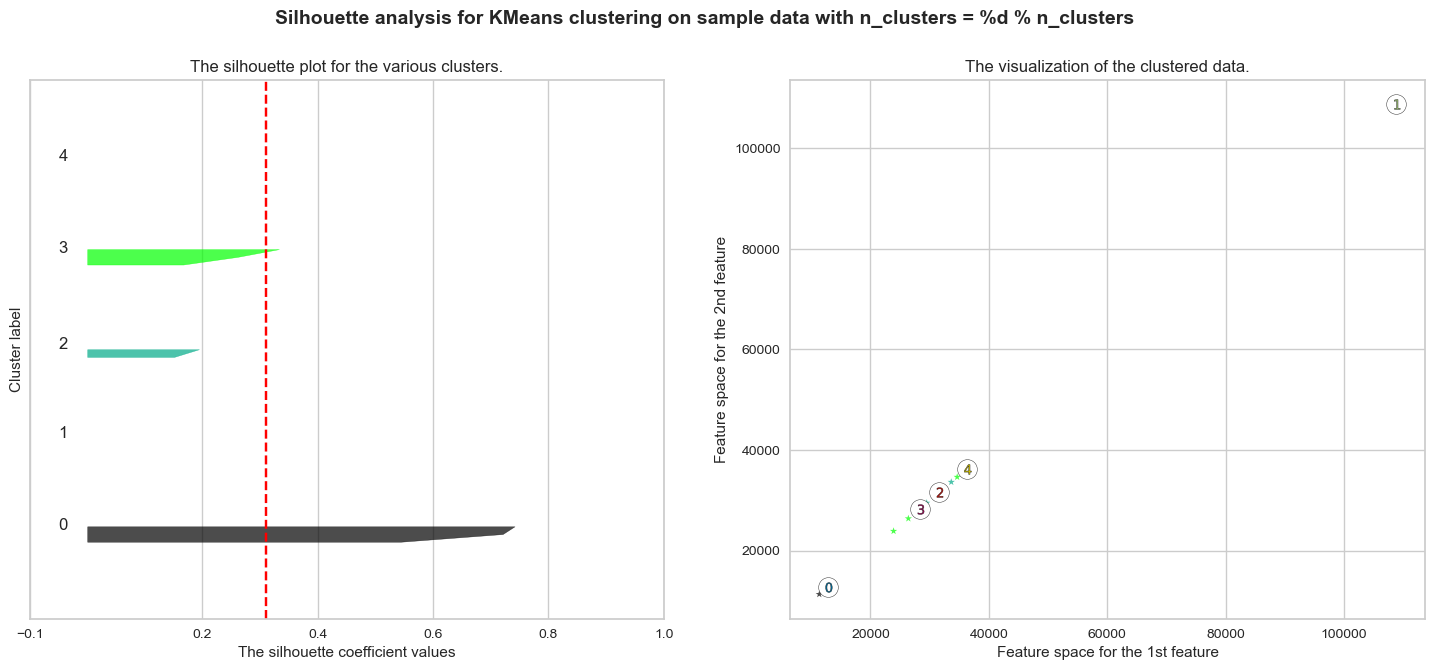

In [144]:
visualize_silhouette(df3, cluster_labels)

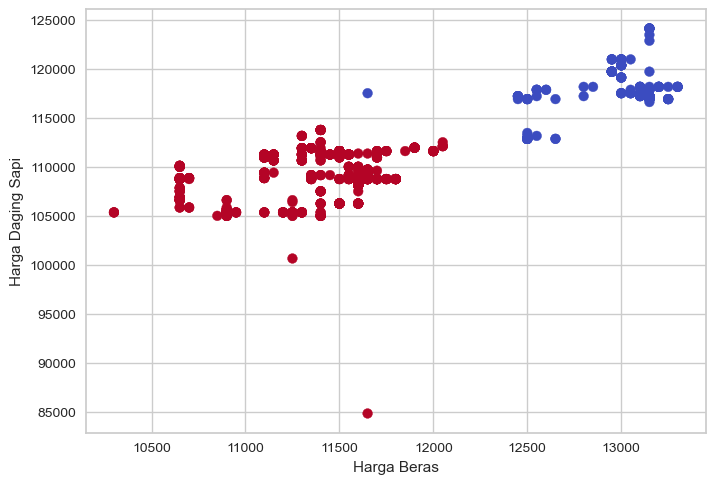

In [145]:
# Assuming 'df' is your DataFrame containing the price data

# Select the features you want to cluster
features = ['Beras', 'Daging Sapi']

# Preprocessing the data
scaled_data = preprocessing.scale(df[features])

# Define the number of clusters
num_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Add color to differentiate between features
import matplotlib.colors as mcolors
colormap = 'coolwarm'

# Plot the clusters
plt.scatter(df['Beras'], df['Daging Sapi'], c=df['Cluster'], cmap = colormap)
plt.xlabel('Harga Beras')
plt.ylabel('Harga Daging Sapi')
# plt.colorbar()

plt.show()

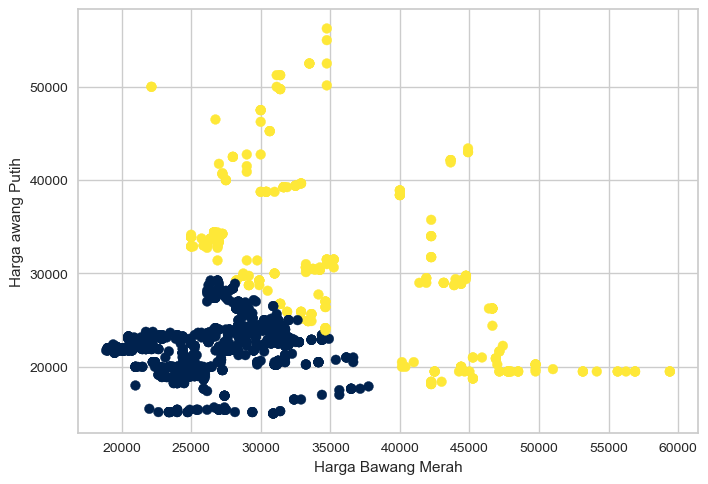

In [146]:
# Assuming 'df' is your DataFrame containing the price data

# Select the features you want to cluster
features = ['Bawang Merah', 'Bawang Putih']

# Preprocessing the data
scaled_data = preprocessing.scale(df[features])

# Define the number of clusters
num_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Add color to differentiate between features
import matplotlib.colors as mcolors
colormap = 'cividis'

# Plot the clusters
plt.scatter(df['Bawang Merah'], df['Bawang Putih'], c=df['Cluster'], cmap = colormap)
plt.xlabel('Harga Bawang Merah')
plt.ylabel('Harga awang Putih')
# plt.colorbar()

plt.show()

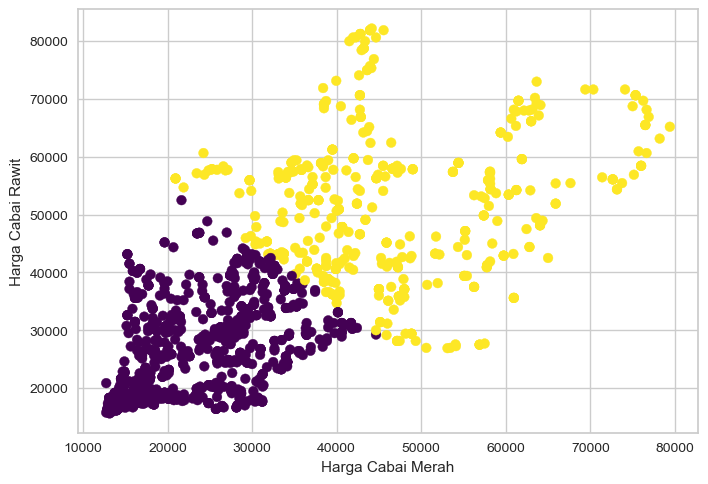

In [147]:
# Assuming 'df' is your DataFrame containing the price data

# Select the features you want to cluster
features = ['Cabai Merah', 'Cabai Rawit']

# Preprocessing the data
scaled_data = preprocessing.scale(df[features])

# Define the number of clusters
num_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Add color to differentiate between features
import matplotlib.colors as mcolors
colormap = 'viridis'

# Plot the clusters
plt.scatter(df['Cabai Merah'], df['Cabai Rawit'], c=df['Cluster'], cmap = colormap)
plt.xlabel('Harga Cabai Merah')
plt.ylabel('Harga Cabai Rawit')
# plt.colorbar()

plt.show()

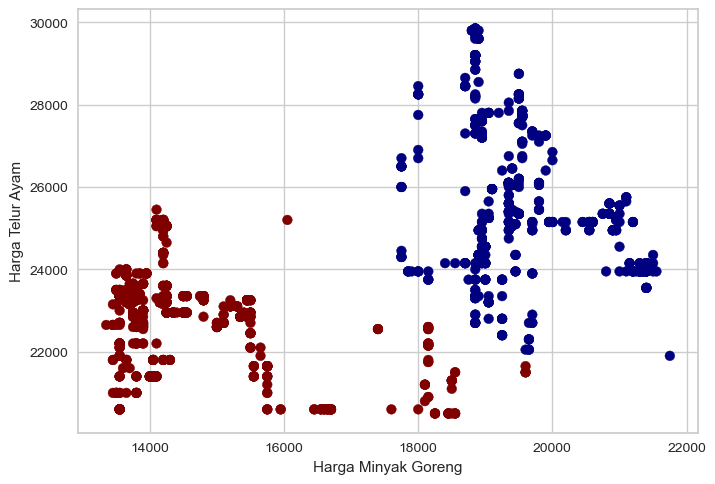

In [148]:
# Assuming 'df' is your DataFrame containing the price data

# Select the features you want to cluster
features = ['Minyak Goreng', 'Telur Ayam']

# Preprocessing the data
scaled_data = preprocessing.scale(df[features])

# Define the number of clusters
num_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Add color to differentiate between features
import matplotlib.colors as mcolors
colormap = 'jet'

# Plot the clusters
plt.scatter(df['Minyak Goreng'], df['Telur Ayam'], c=df['Cluster'], cmap = colormap)
plt.xlabel('Harga Minyak Goreng')
plt.ylabel('Harga Telur Ayam')
# plt.colorbar()

plt.show()

In [149]:
df['Bulan'] = df['Date']. dt.month
df['Tahun'] = df['Date'].dt.year
df['Hari'] = df['Date'].dt.day_name()
df.to_excel('HargaKomoditas.xlsx','sheet1')

Text(0.5, 1.0, 'Tren Harga Komoditas (dalam Tahunan)')

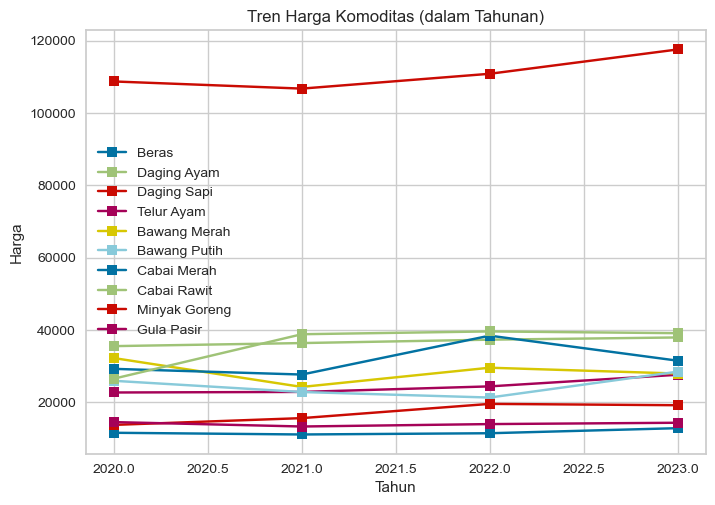

In [150]:
ft =  ['Beras', 'Daging Ayam','Daging Sapi','Telur Ayam', 'Bawang Merah', 'Bawang Putih', 'Cabai Merah', 'Cabai Rawit', 'Minyak Goreng', 'Gula Pasir']
dfy1 = df.groupby(['Tahun']).mean()[ft]
dfy1.plot(marker = 's')
plt.ylabel('Harga')
plt.title('Tren Harga Komoditas (dalam Tahunan)')

Text(0.5, 1.0, 'Tren Harga Komoditas (dalam Bulanan)')

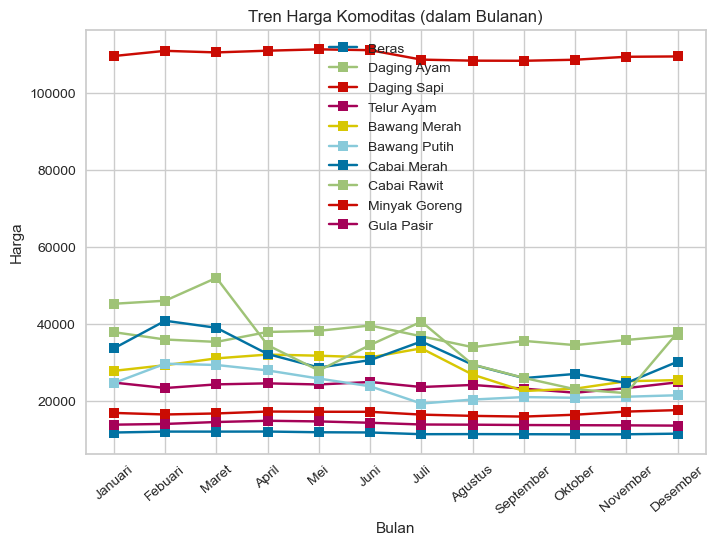

In [152]:
ft =  ['Beras', 'Daging Ayam','Daging Sapi','Telur Ayam', 'Bawang Merah', 'Bawang Putih', 'Cabai Merah', 'Cabai Rawit', 'Minyak Goreng', 'Gula Pasir']
dfy1 = df.groupby(['Bulan']).mean()[ft]
dfy1.plot(marker = 's')
plt.ylabel('Harga')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Januari','Febuari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'],rotation=40)
plt.title('Tren Harga Komoditas (dalam Bulanan)')

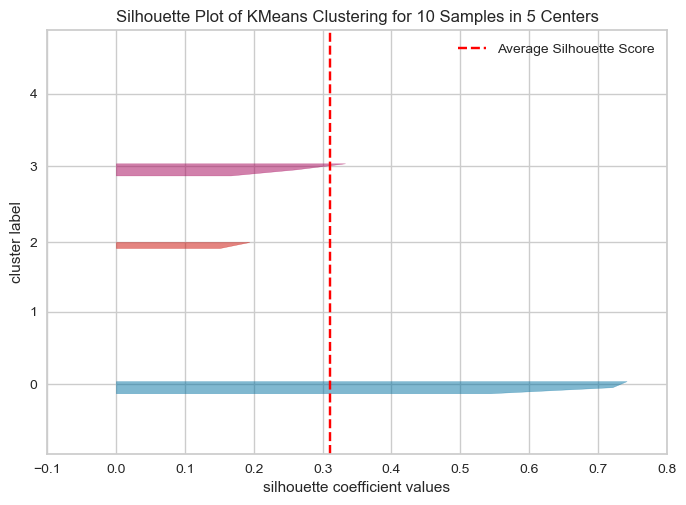

silhouette average score is 0.31097024318645144


In [154]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Instantiate the clustering model and visualizer
clusterer = KMeans(n_clusters = 5, random_state = 0)
visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick')

visualizer.fit(df3) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

cluster_labels = clusterer.fit_predict(df3)
silhouette_avg = silhouette_score(df3, cluster_labels)
print('silhouette average score is', silhouette_avg)